In [1]:
import pandas as pd
import numpy as np

%precision 3

'%.3f'

In [6]:
df_pub = pd.read_csv("data/공립일반고.csv")
df_ind = pd.read_csv("data/사립일반고.csv")

pub_keyword = np.array(df_pub['키워드 등장 수'])
ind_keyword = np.array(df_ind['키워드 등장 수'])

In [50]:
#사례수, 자유도 해놓은거
pub_n = len(pub_keyword)
ind_n = len(ind_keyword)

pub_df = pub_n - 1
ind_df = ind_n - 1
df = pub_df + ind_df

pub_df, ind_df

(24, 38)

In [53]:
#분산(불편파추정치)
pub_var = np.var(pub_keyword)
ind_var = np.var(ind_keyword)

pub_var , ind_var

(108.218, 144.041)

In [54]:
#통합분산
P_var = (pub_df*pub_var + ind_df*ind_var) / (pub_df + ind_df)
P_var

130.174

In [55]:
#표집분포의 표준오차
SE = np.sqrt(P_var*(1/pub_n+1/ind_n))
SE

2.923

In [56]:
#이건 그냥 평균
pub_mean = np.mean(pub_keyword)
ind_mean = np.mean(ind_keyword)

pub_mean, ind_mean

(38.320, 32.103)

In [57]:
#두 독립집단 t값
t_value = (pub_mean - ind_mean) / SE
t_value

2.127

In [58]:
#두 독립집단 t검정 진행
#유의수준: 0.05
from scipy.stats import t

alpha = 0.05

cri_value = t.ppf(1 - alpha/2, df)

print(f"자유도 {df}, 유의수준 {alpha}에서의 기각값: {cri_value:.4f}")
if (np.abs(t_value) > cri_value) :
    print("유의미한 차이 있음 (영가설 기각)")
else :
    print("유의미한 차이 없음 (영가설 기각 불가)")

자유도 62, 유의수준 0.05에서의 기각값: 1.9990
유의미한 차이 있음 (영가설 기각)


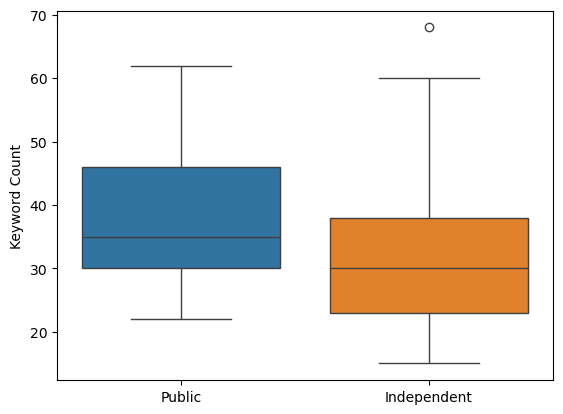

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 합쳐서 그리기
sns.boxplot(data=[pub_keyword, ind_keyword])
plt.xticks([0, 1], ['Public', 'Independent'])
plt.ylabel('Keyword Count')
plt.show()

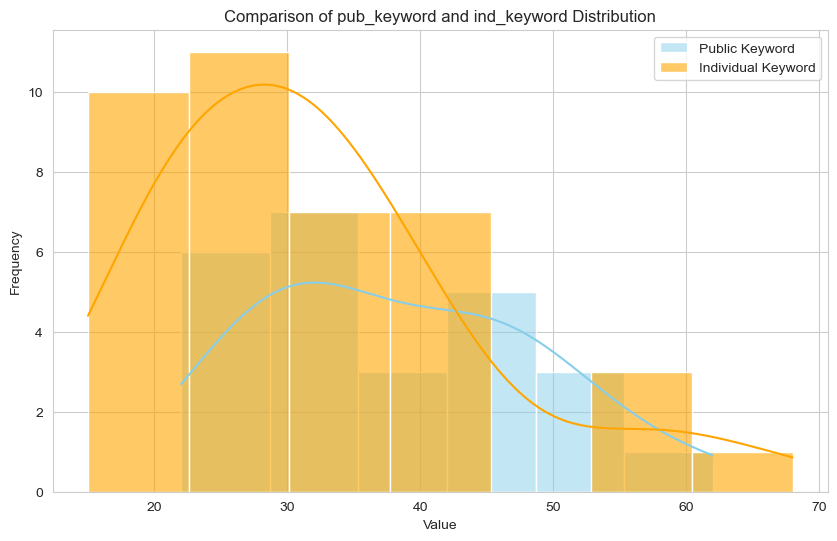

In [62]:
# 그래프 스타일 설정
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# pub_keyword 도수분포표 (파란색)
sns.histplot(pub_keyword, color="skyblue", label='공립', kde=True, stat="count")

# ind_keyword 도수분포표 (주황색, 투명도 조절)
sns.histplot(ind_keyword, color="orange", label='Individual Keyword', kde=True, stat="count", alpha=0.6)

# 그래프 정보 추가
plt.title('공립 사립')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend() # 범례 표시

plt.show()